## DIFERENÇAS ENTRE ADABOOST E GBM

1. Foco na Correção de Erros:

AdaBoost: Foca nos erros de classificação. A cada iteração, ele aumenta o peso das amostras que foram classificadas incorretamente pelo modelo anterior. O novo modelo é treinado para dar mais atenção a esses "erros difíceis", forçando-o a corrigi-los.

GBM: Foca nos resíduos (a diferença entre o valor real e o valor previsto). Cada novo modelo é treinado para prever os erros (resíduos) do modelo anterior. Em vez de reponderar as amostras, ele tenta diretamente modelar o erro que o conjunto de modelos anterior cometeu.

2. Influência dos Modelos Anteriores:

AdaBoost: Cada novo modelo é influenciado diretamente pelo desempenho do modelo anterior através da reponderação das amostras. Um erro na classificação de uma amostra pelo modelo k fará com que essa amostra tenha um peso maior para o treinamento do modelo k+1.

GBM: Cada novo modelo é treinado nos resíduos do conjunto de todos os modelos anteriores. Ele não aprende com o erro de apenas um modelo, mas sim com o erro acumulado de todo o "comitê" de modelos já treinado.

3. Flexibilidade na Função de Perda (Loss Function):

AdaBoost: Tradicionalmente, utiliza uma função de perda exponencial. Isso o torna muito sensível a outliers e ruídos, pois amostras classificadas incorretamente com alta confiança recebem um peso exponencialmente grande.

GBM: É muito mais flexível. Ele permite o uso de diversas funções de perda diferenciáveis, o que o torna aplicável a uma gama maior de problemas (regressão, classificação, ranking, etc.). Por exemplo, para regressão, pode-se usar o erro quadrático médio (L2 loss), e para classificação, a perda logística (log-loss).

4. Contribuição dos Modelos Fracos (Weak Learners):

AdaBoost: A contribuição de cada modelo fraco para a predição final é determinada por seu desempenho geral (sua taxa de erro). Modelos com maior acurácia têm um "voto" mais forte na decisão final.

GBM: A contribuição de cada novo modelo é geralmente controlada por um hiperparâmetro fixo chamado learning rate (taxa de aprendizado). Esse parâmetro reduz a contribuição de cada modelo, ajudando a prevenir o overfitting e tornando o processo de aprendizado mais robusto.

5. Paralelização:

AdaBoost: O processo é inerentemente sequencial. O treinamento do modelo k+1 depende diretamente dos pesos calculados a partir dos erros do modelo k. Isso torna a paralelização do treinamento dos modelos base muito difícil.

GBM: Embora a adição de novas árvores seja sequencial (pois cada árvore aprende com os resíduos da anterior), a construção de cada árvore individualmente (encontrar os melhores cortes, por exemplo) pode ser paralelizada. Isso pode levar a uma vantagem de velocidade em hardware com múltiplos núcleos.

In [1]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Geração dos Dados ---
# Criando um conjunto de dados sintético para classificação
X, y = make_classification(
    n_samples=1000,          # Número de amostras
    n_features=20,           # Número de características
    n_informative=10,        # Número de características informativas
    n_redundant=5,           # Número de características redundantes
    n_classes=2,             # Número de classes (binário)
    random_state=42
)

# --- 2. Divisão dos Dados ---
# Separando os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")

# --- 3. Treinamento do Modelo ---
# Instanciando o Gradient Boosting Classifier
# Principais hiperparâmetros:
# n_estimators: número de árvores (etapas de boosting)
# learning_rate: taxa de aprendizado que pondera a contribuição de cada árvore
# max_depth: profundidade máxima de cada árvore de decisão
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Treinando o modelo com os dados de treino
gb_clf.fit(X_train, y_train)

# --- 4. Avaliação do Modelo ---
# Fazendo previsões nos dados de teste
y_pred = gb_clf.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.4f}")

# Exibindo um relatório de classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Formato dos dados de treino: (700, 20)
Formato dos dados de teste: (300, 20)

Acurácia do modelo: 0.9067

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       160
           1       0.87      0.94      0.90       140

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Formato dos dados de treino: (700, 15)
Formato dos dados de teste: (300, 15)

Erro Quadrático Médio (MSE): 2601.5922
Coeficiente de Determinação (R²): 0.9063


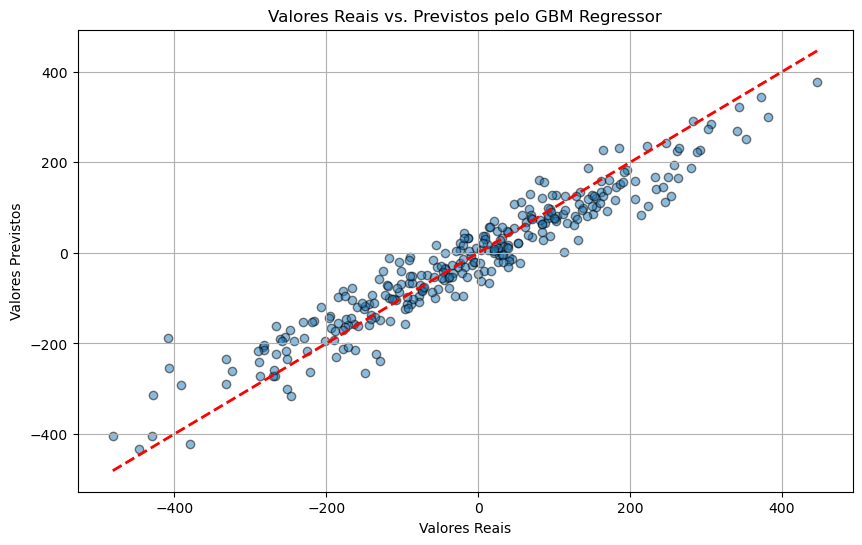

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Geração dos Dados ---
# Criando um conjunto de dados sintético para regressão
X, y = make_regression(
    n_samples=1000,      # Número de amostras
    n_features=15,       # Número de características
    n_informative=10,    # Número de características informativas
    noise=20,            # Ruído adicionado aos dados
    random_state=42
)

# --- 2. Divisão dos Dados ---
# Separando os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")

# --- 3. Treinamento do Modelo ---
# Instanciando o Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    loss='squared_error', # Função de perda a ser otimizada ('ls' para Least Squares)
    random_state=42
)

# Treinando o modelo com os dados de treino
gb_reg.fit(X_train, y_train)

# --- 4. Avaliação do Modelo ---
# Fazendo previsões nos dados de teste
y_pred = gb_reg.predict(X_test)

# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nErro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# --- 5. Visualização dos Resultados ---
# Plotando os valores reais vs. os valores previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Previstos pelo GBM Regressor")
plt.grid(True)
plt.show()

### HYPERPARÂMETROS

1. n_estimators

O que é? Representa o número total de árvores de decisão (ou "etapas de boosting") que serão construídas sequencialmente.

Para que serve? Controla a complexidade do modelo. Um número muito baixo pode levar a um modelo subajustado (underfitting), que não captura bem a relação nos dados. Um número muito alto pode levar a um modelo sobreajustado (overfitting), que se ajusta demais ao ruído dos dados de treino e perde a capacidade de generalização, além de aumentar o custo computacional. Geralmente, n_estimators é ajustado em conjunto com a learning_rate.

2. learning_rate (Taxa de Aprendizado)

O que é? É um fator de ponderação (geralmente entre 0 e 1) que reduz a contribuição de cada árvore adicionada ao modelo. É também chamado de shrinkage.

Para que serve? Controla a velocidade com que o modelo aprende e se ajusta aos erros residuais. Um valor baixo (ex: 0.01, 0.1) exige um n_estimators maior para construir um bom modelo, mas o resultado tende a ser mais robusto e com melhor generalização. Um valor alto (ex: 0.5, 1.0) faz o modelo aprender mais rápido, mas aumenta o risco de overfitting. Existe um trade-off clássico entre learning_rate e n_estimators.

3. max_depth (Profundidade Máxima)

O que é? Define a profundidade máxima de cada árvore de decisão individual que compõe o ensemble.

Para que serve? Controla a complexidade de cada modelo base e limita o nível de interação entre as características que o modelo pode aprender. Valores baixos (ex: 3 a 5) criam árvores mais simples e rápidas de treinar, o que geralmente ajuda a evitar o overfitting. Valores muito altos podem fazer com que o modelo se ajuste demais aos dados de treino.

4. subsample (Subamostragem)

O que é? É a fração de amostras (linhas) do conjunto de dados de treino que será utilizada para treinar cada árvore individual. O valor é geralmente definido entre 0 e 1.

Para que serve? Introduz estocasticidade (aleatoriedade) no processo de treinamento, o que ajuda a reduzir a variância do modelo e a prevenir o overfitting. Usar um valor menor que 1.0 (ex: 0.8) significa que cada árvore é treinada em uma subamostra diferente dos dados, tornando o modelo final mais robusto. Essa técnica é conhecida como Stochastic Gradient Boosting.

5. min_samples_split (Mínimo de Amostras para Divisão)

O que é? É o número mínimo de amostras que um nó interno de uma árvore precisa ter para que possa ser dividido em dois novos nós.

Para que serve? É outra forma de controlar a complexidade da árvore. Se um nó tem menos amostras do que o valor definido por este hiperparâmetro, ele não será mais dividido e se tornará um nó folha (uma decisão final). Aumentar este valor pode tornar o modelo mais conservador e ajudar a prevenir o overfitting, pois impede que a árvore crie divisões baseadas em um número muito pequeno de amostras. Um parâmetro relacionado é o min_samples_leaf, que define o número mínimo de amostras em um nó folha.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error

In [6]:
%%time
# --- 1. Geração dos Dados ---
# Usando o mesmo conjunto de dados do exemplo anterior para consistência
X_clf, y_clf = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Dividindo os dados em treino e teste
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# --- 2. Definição do Grid de Hiperparâmetros ---
# Um grid menor para execução mais rápida.
# Em um projeto real, você pode testar mais valores.
param_grid_clf = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# --- 3. Configuração e Execução do GridSearchCV ---
# Instanciando o modelo
gb_clf = GradientBoostingClassifier(random_state=42)

# Instanciando o GridSearchCV
# cv=5 significa que usaremos validação cruzada com 5 folds
# n_jobs=-1 usa todos os processadores disponíveis para acelerar a busca
# scoring='accuracy' define a métrica de avaliação
grid_search_clf = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid_clf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2 # Mostra o progresso do treinamento
)

print("Iniciando a busca pelos melhores hiperparâmetros para classificação...")
# Executando a busca
grid_search_clf.fit(X_train_clf, y_train_clf)

# --- 4. Exibição dos Resultados ---
print("\nBusca finalizada!")
print("---------------------------------------------------------")
print(f"Melhores Hiperparâmetros encontrados: {grid_search_clf.best_params_}")
print(f"Melhor Score (Acurácia) na validação cruzada: {grid_search_clf.best_score_:.4f}")
print("---------------------------------------------------------")

# Avaliando o melhor modelo encontrado nos dados de teste
best_clf = grid_search_clf.best_estimator_
y_pred_clf = best_clf.predict(X_test_clf)
test_accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"\nAcurácia do melhor modelo nos dados de teste: {test_accuracy:.4f}")

Iniciando a busca pelos melhores hiperparâmetros para classificação...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Busca finalizada!
---------------------------------------------------------
Melhores Hiperparâmetros encontrados: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Melhor Score (Acurácia) na validação cruzada: 0.9471
---------------------------------------------------------

Acurácia do melhor modelo nos dados de teste: 0.9133
CPU times: total: 766 ms
Wall time: 32.6 s


In [7]:
%%time
# --- 1. Geração dos Dados ---
X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=15,
    n_informative=10,
    noise=20,
    random_state=42
)

# Dividindo os dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# --- 2. Definição do Grid de Hiperparâmetros ---
# Podemos usar um grid similar, ajustando se necessário
param_grid_reg = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4]
}

# --- 3. Configuração e Execução do GridSearchCV ---
# Instanciando o modelo
gb_reg = GradientBoostingRegressor(random_state=42)

# Instanciando o GridSearchCV
# Para regressão, usamos 'neg_mean_squared_error' como métrica.
# O GridSearchCV tenta maximizar a métrica, por isso usamos o MSE negativo.
grid_search_reg = GridSearchCV(
    estimator=gb_reg,
    param_grid=param_grid_reg,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

print("\nIniciando a busca pelos melhores hiperparâmetros para regressão...")
# Executando a busca
grid_search_reg.fit(X_train_reg, y_train_reg)

# --- 4. Exibição dos Resultados ---
print("\nBusca finalizada!")
print("---------------------------------------------------------")
print(f"Melhores Hiperparâmetros encontrados: {grid_search_reg.best_params_}")
# O score é negativo, então usamos o sinal de menos para obter o MSE positivo
best_mse_cv = -grid_search_reg.best_score_
print(f"Melhor Score (MSE) na validação cruzada: {best_mse_cv:.4f}")
print("---------------------------------------------------------")

# Avaliando o melhor modelo encontrado nos dados de teste
best_reg = grid_search_reg.best_estimator_
y_pred_reg = best_reg.predict(X_test_reg)
test_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"\nErro Quadrático Médio (MSE) do melhor modelo nos dados de teste: {test_mse:.4f}")


Iniciando a busca pelos melhores hiperparâmetros para regressão...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Busca finalizada!
---------------------------------------------------------
Melhores Hiperparâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200}
Melhor Score (MSE) na validação cruzada: 2509.4322
---------------------------------------------------------

Erro Quadrático Médio (MSE) do melhor modelo nos dados de teste: 2093.0745
CPU times: total: 375 ms
Wall time: 8.59 s


### DIFERENÇA

GBM Padrão (Tradicional)
O algoritmo treina a primeira árvore.

Calcula os erros (resíduos) para todas as amostras do conjunto de treino.

Treina a segunda árvore para tentar prever os erros calculados no passo anterior, usando novamente todas as amostras.

Repete esse processo para todas as n árvores.

O processo é determinístico no que diz respeito ao uso dos dados: cada árvore sempre vê o conjunto de dados completo.

Stochastic GBM (A Proposta de Friedman)
Antes de construir uma nova árvore, o algoritmo seleciona aleatoriamente uma fração (por exemplo, 80%) das amostras de treino, sem reposição.

Calcula os erros (resíduos) apenas para essa subamostra selecionada.

Treina a nova árvore para prever esses erros, usando apenas essa mesma subamostra.

Repete o processo para todas as n árvores, sorteando uma nova subamostra a cada vez.

Essa introdução de aleatoriedade (estocasticidade) no processo de ajuste das árvores é a grande sacada.

Por que essa diferença é tão importante?
A introdução da subamostragem aleatória, que dá o nome ao algoritmo, traz duas vantagens cruciais:

Redução de Overfitting e Melhor Generalização: Ao treinar cada árvore em uma porção ligeiramente diferente dos dados, o modelo final se torna mais robusto. As árvores se tornam menos correlacionadas entre si, e o ensemble (o conjunto de árvores) tem menos chance de "memorizar" o ruído específico do conjunto de treino. Isso melhora drasticamente a capacidade do modelo de generalizar para dados novos e nunca vistos.

Aceleração do Treinamento: Construir uma árvore de decisão em um subconjunto de dados é computacionalmente mais rápido do que usar o conjunto de dados completo. Embora o processo geral ainda seja sequencial, cada etapa individual se torna mais rápida, o que pode levar a uma aceleração significativa do tempo total de treinamento, especialmente com grandes volumes de dados.